In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns
import dill
sns.set()

CrashData = pd.read_csv(r'Data/CrashData.csv',low_memory=False) # Crash data --- location, time, etc.
VolumeCounts = pd.read_csv(r'Data/VolumeCounts.csv') # Volume count data for specific roadways
lion = dill.load(open('fullLionData.pkd','r')) # Roadway feature data downloaded in chunks using api

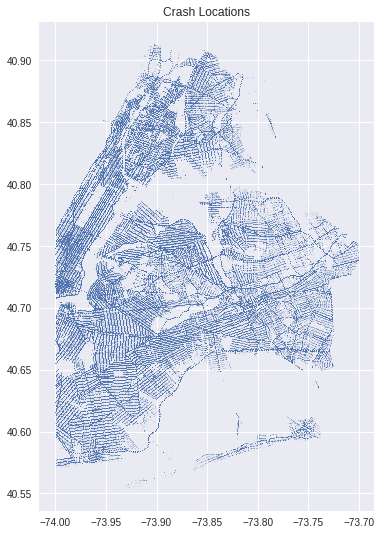

In [2]:
df=CrashData

df = df[df['LONGITUDE']<-72]
df = df[df['LONGITUDE']>-74]
df = df[df['LATITUDE']>30]
df = df[df['LATITUDE']<41]
x = df['LONGITUDE']
y = df['LATITUDE']

fig = plt.figure(figsize=(6,9))
ax = fig.add_subplot(111, title="Crash Locations")
ax.scatter(x,y,s=0.2,alpha=0.2)
plt.show()

In [3]:
reduced_lion=[(r['id'],
               r['geometry']['coordinates'][0][0],
               r['geometry']['coordinates'][0][1],
               r['geometry']['coordinates'][1][0],
               r['geometry']['coordinates'][1][1],
               r['properties']['Street'], 
               r['properties']['Number_Total_Lanes'], 
               r['properties']['SegmentID'] 
              ) for r in lion]

lf = pd.DataFrame(reduced_lion,columns=['id','x1','y1','x2','y2','Street','Lanes','SegmentID'])

lf=lf[lf['Lanes']>=1] #Remove non-road features
lf=lf[lf['x1']>-74] # Remove features outside the border of the above map

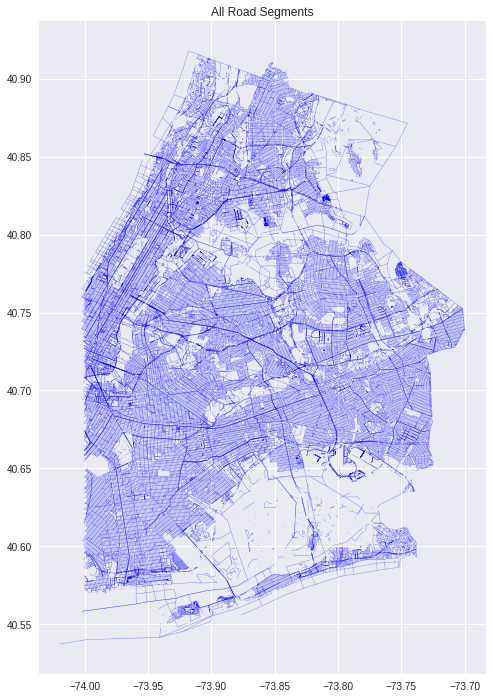

In [4]:
lines = [[(row[2],row[3]),(row[4],row[5])] for row in lf.itertuples()]

fig=plt.figure(figsize=(8,12)) # 16,24    20,30
ax=fig.add_subplot(111,title="All Road Segments")

lc=mc.LineCollection(lines,color='blue',linewidths=0.5,alpha=0.4)
ax.add_collection(lc)

ax.scatter(x,y,s=1.2,alpha=0,color='red')

plt.show()

In [5]:
VCroads = VolumeCounts['GIS ID'].unique()
def VCflag(segID):
    return int(segID) in VCroads
lf['VCflag']=lf['SegmentID'].apply(VCflag)
VCsegs = lf[lf['VCflag']]

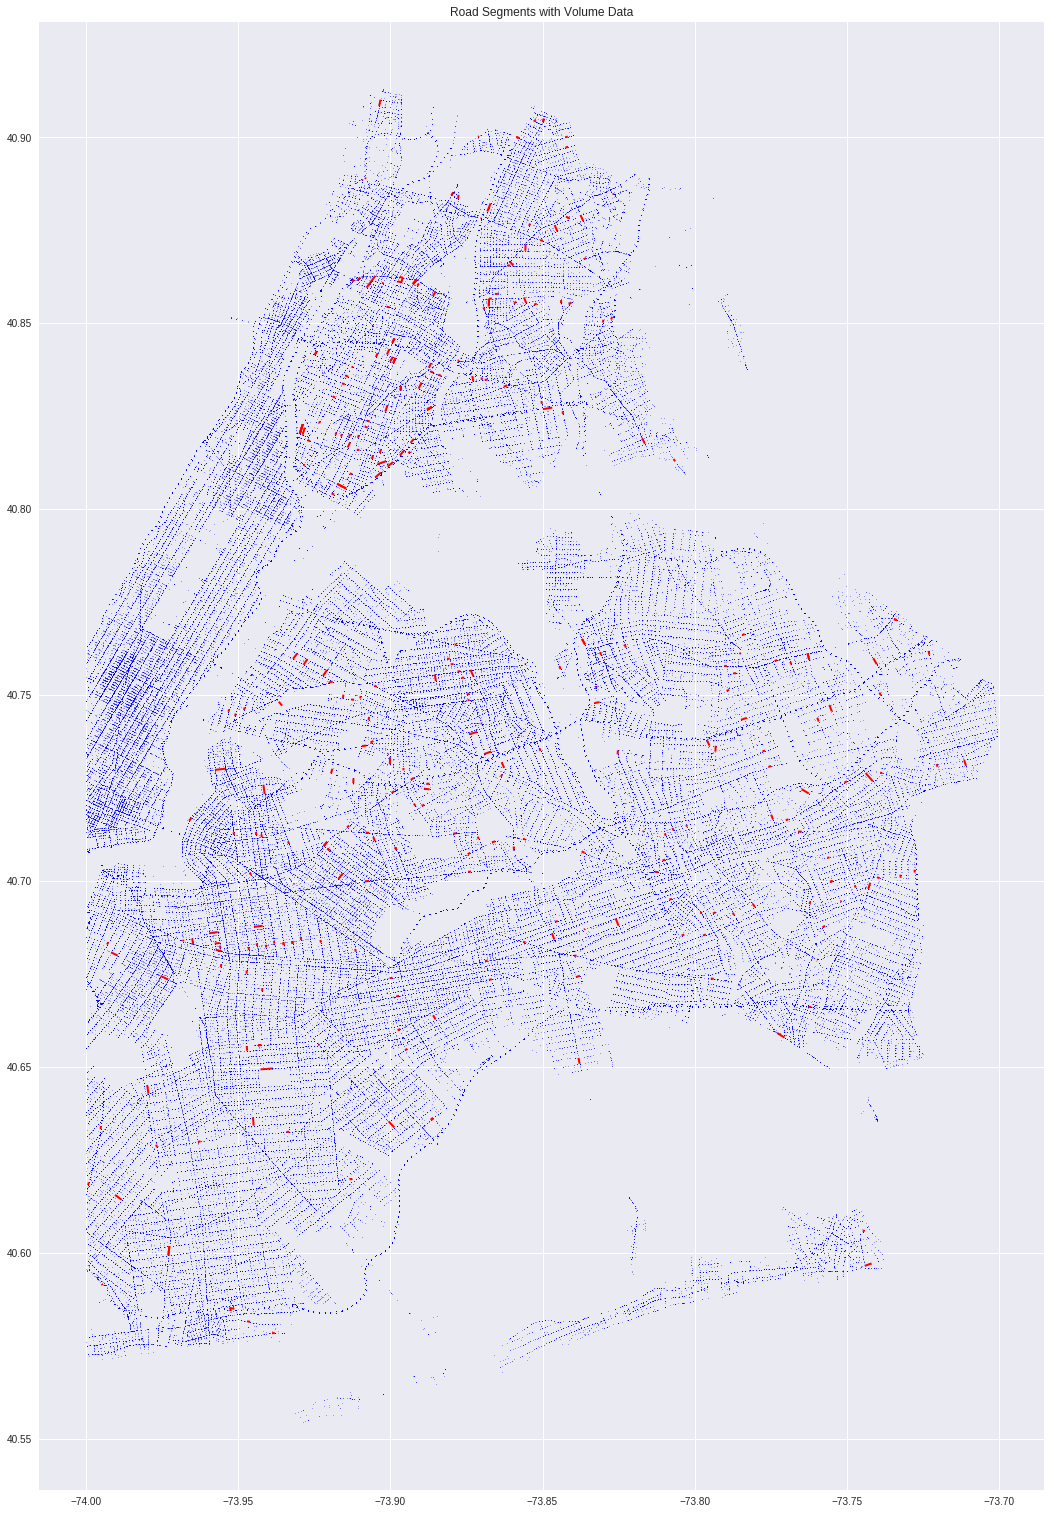

In [6]:
lines = [[(row[2],row[3]),(row[4],row[5])] for row in VCsegs.itertuples()]

fig=plt.figure(figsize=(18,27))
ax=fig.add_subplot(111,title="Road Segments with Volume Data")

lc=mc.LineCollection(lines,color='red',linewidths=2,alpha=1)

ax.scatter(x,y,s=0.3,alpha=0.5,color='blue')
ax.add_collection(lc)

plt.show()